In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd



In [2]:
data = pd.read_csv('data.csv')

In [3]:
data

,num_ligne,ID_Client,Nom,Score_Credit,Pays,Sex,Age,Tenure,Balance,Num_Produit,il_a_CrCard,Membre_actif,Salaire_estime,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


Je choisis comme target le désabonnement, et comme features le sexe et les pays

In [4]:
y = data["Exited"].values.reshape(-1,1)
X = data[['Sex','Pays']]

print(X.shape)
print(y.shape)

(10000, 2)
(10000, 1)


In [5]:
from sklearn.preprocessing import LabelEncoder,  StandardScaler
labelencoder = LabelEncoder()

X["Pays"] = labelencoder.fit_transform(X["Pays"])
X["Sex"] = labelencoder.fit_transform(X["Sex"])
print(X["Pays"])
print(X["Sex"])
y = labelencoder.fit_transform(y)
print(y)

0       0
1       2
2       0
3       0
4       2
       ..
9995    0
9996    0
9997    0
9998    1
9999    0
Name: Pays, Length: 10000, dtype: int32
0       0
1       0
2       0
3       0
4       0
       ..
9995    1
9996    1
9997    0
9998    1
9999    0
Name: Sex, Length: 10000, dtype: int32
[1 0 1 ... 1 1 0]


<ipython-input-5-1d696718c553>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Pays"] = labelencoder.fit_transform(X["Pays"])
<ipython-input-5-1d696718c553>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Sex"] = labelencoder.fit_transform(X["Sex"])
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwar

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

In [8]:
print(X_test.shape)
print(y_test.shape)
print(X_train.shape)
print(y_train.shape)

(2000, 2)
(2000,)
(8000, 2)
(8000,)


Je normalise les valeurs de X

In [9]:
standard = StandardScaler()
X = standard.fit_transform(X)
X

array([[-1.09598752, -0.90188624],
       [-1.09598752,  1.51506738],
       [-1.09598752, -0.90188624],
       ...,
       [-1.09598752, -0.90188624],
       [ 0.91241915,  0.30659057],
       [-1.09598752, -0.90188624]])

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_test, X_train, y_test, y_train = train_test_split(X,y,test_size=0.2,random_state=0)
print(X_test.shape)
print(y_test.shape)
print(X_train.shape)
print(y_train.shape)

(8000, 2)
(8000,)
(2000, 2)
(2000,)


In [12]:
from sklearn.linear_model import LogisticRegression
logisticReg = LogisticRegression(solver='liblinear', random_state=0)
logisticReg.fit(X_train, y_train)


LogisticRegression(random_state=0, solver='liblinear')

In [13]:
y_pred_train = logisticReg.predict(X_train)
y_pred_test = logisticReg.predict(X_test)
print(y_pred_train)
print(y_pred_test)

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


Comparaison du score entre données d'entraînement et de test

In [14]:
from sklearn.metrics import accuracy_score

In [15]:
score =accuracy_score(y_test, y_pred_test)
score

0.796

In [16]:
score =accuracy_score(y_train, y_pred_train)
score

0.7975

Autre façon de le faire

In [17]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(logisticReg.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(logisticReg.score(X_test, y_test)))

Training set score: 0.7975
Test set score: 0.7960


Nous pouvons dire que l'entraînement du modèle s'est bien déroulé étant donné que l'on constate une différence de score quasi inexistante entre les données de test et d'entraînement.

Je reteste avec le PCA comme on l'a vu dans un des derniers Kata

In [18]:
from sklearn.decomposition import PCA

In [19]:
pca = PCA(n_components=0.75)

In [20]:
X_pca = pca.fit_transform(X_train)
logisticReg_pca =  LogisticRegression(solver='liblinear', random_state=0)
logisticReg_pca.fit(X_pca, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [21]:
X_test_pca = pca.transform(X_test)
y_test_prediction_pca = logisticReg.predict(X_test_pca)
y_test_prediction_pca

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [22]:
X_train_pca = X_pca
y_train_prediction_pca = logisticReg.predict(X_train_pca)
y_train_prediction_pca

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [23]:
display(accuracy_score(y_train, y_train_prediction_pca))
display(accuracy_score(y_test, y_test_prediction_pca))

0.7975

0.796

Au vu des résultats on peut dire que l'utilisation du PCA est inutile il n'améliore  pas l'entraînement de notre modèle, cela serait causé par la réduction de la dimensionalité


Utilisons un autre modèle

In [24]:
from sklearn.ensemble import RandomForestClassifier

In [25]:
forest = RandomForestClassifier(n_estimators=80)
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=80)

In [26]:
y_pred_train = forest.predict(X_train)
y_pred_test = forest.predict(X_test)

In [27]:
display(accuracy_score(y_train, y_pred_train))
display(accuracy_score(y_test, y_pred_test))

0.7975

0.796

Il semble qu'on obtienne les même résultats avec ce modèle aussi, regardons si le PCA apporte une quelconque amélioration

In [28]:
X_pca = pca.fit_transform(X_train)
forest_pca = RandomForestClassifier(n_estimators=80)
forest_pca.fit(X_pca, y_train)

RandomForestClassifier(n_estimators=80)

In [29]:
X_test_pca = pca.transform(X_test)
y_test_prediction_pca = forest_pca.predict(X_test_pca)
y_test_prediction_pca

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [30]:
X_train_pca = X_pca
y_train_prediction_pca = forest_pca.predict(X_train_pca)
y_train_prediction_pca

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [31]:
display(accuracy_score(y_train, y_train_prediction_pca))
display(accuracy_score(y_test, y_test_prediction_pca))

0.7975

0.796

Le PCA n'apporte aucune amélioration 

Mise en place du réseau neuronal 

In [32]:
from tensorflow.keras import layers, models

In [33]:
#Construction du modèle
model = models.Sequential()
# Définition de l'entrée et de la couche cachée
model.add(layers.Dense(10, kernel_initializer = "uniform", activation='relu', input_shape=(2,)))
model.add(layers.Dense(20, kernel_initializer = "uniform", activation='relu'))
# Construction de la couche de sortie
model.add(layers.Dense(1, kernel_initializer = "uniform",  activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                30        
_________________________________________________________________
dense_1 (Dense)              (None, 20)                220       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 21        
Total params: 271
Trainable params: 271
Non-trainable params: 0
_________________________________________________________________


In [34]:
#compilation du modèle
model.compile(optimizer='adam', loss="binary_crossentropy", metrics=['accuracy'])

In [35]:
history = model.fit(X_train, y_train, batch_size=10, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
200/200 [==============================] - 7s 22ms/step - loss: 0.6553 - accuracy: 0.7936 - val_loss: 0.5051 - val_accuracy: 0.7960
Epoch 2/10
200/200 [==============================] - 1s 4ms/step - loss: 0.4735 - accuracy: 0.8194 - val_loss: 0.4969 - val_accuracy: 0.7960
Epoch 3/10
200/200 [==============================] - 1s 5ms/step - loss: 0.5013 - accuracy: 0.7904 - val_loss: 0.4939 - val_accuracy: 0.7960
Epoch 4/10
200/200 [==============================] - 1s 4ms/step - loss: 0.4926 - accuracy: 0.7966 - val_loss: 0.4927 - val_accuracy: 0.7960
Epoch 5/10
200/200 [==============================] - 1s 4ms/step - loss: 0.5250 - accuracy: 0.7706 - val_loss: 0.4920 - val_accuracy: 0.7960
Epoch 6/10
200/200 [==============================] - 1s 4ms/step - loss: 0.4925 - accuracy: 0.7961 - val_loss: 0.4910 - val_accuracy: 0.7960
Epoch 7/10
200/200 [==============================] - 1s 5ms/step - loss: 0.4788 - accuracy: 0.8071 - val_loss: 0.4908 - val_accuracy: 0.7960
Epoch

#### Evaluation des performances 


In [36]:

test_loss, test_acc = model.evaluate(X_test, y_test)
# on imprime la performance du modèle
print('\nTest accuracy:', test_acc)

250/250 [==============================] - 1s 1ms/step - loss: 0.4895 - accuracy: 0.7960

Test accuracy: 0.7960000038146973


In [38]:
pred = model.predict(X_test)
pred = (pred > 0.50)
pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [44]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

<AxesSubplot:>

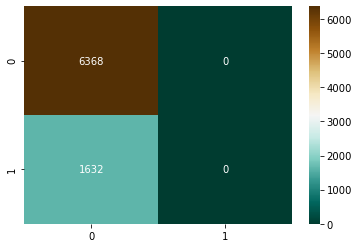

In [52]:
conf = confusion_matrix(y_test, pred)
sns.heatmap(conf, cmap='BrBG_r', annot=True, fmt='d')

Selon le réseau de neuronnes, on aurait 6368 abonnés qui comptent restés inscrits contre 1632 personnes souhaitant se désinscrire.